# Logistic Regression

## Hypothesis space
- Samples of dimension $ d $ 
- Linearly separable  
$ \implies $ 
  - $h_w(x)$ produces a linear discriminant of dimension $ d-1 $ (eg with two features we'll have a line) 
  - linear discriminant expressed as $ w^Tx + b = 0$
  - if $ x_0 = 1 $ for every sample and $ w_0 = b $ then it reduces to $ w^Tx = 0$
- Specifically we use the sigmoid function: $h_w(x) = g(w^Tx) = \frac{1}{1 + e^{-w^Tx}}$

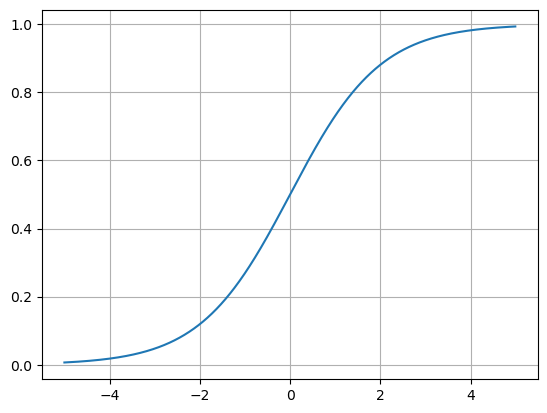

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def logisticFunction(t):
    return 1/(1+np.exp(-t))

t = np.arange(-5,5,0.01)
y = logisticFunction(t)

plt.plot(t,y); plt.grid()

## So how do we predict
- Supposing we have two classes, 0 and 1  
- By imposing a threshold at - let's say - 0.5
  - If $g(w^Tx) \geq 0.5$ then we predict class 1
  - If $g(w^Tx) < 0.5$ then we predict class 0

## Role of the bias?
- Since the bias doesn't interact directly with the features, it simply shifts the prediction even before it happens

## How do we fit $w$ ?

### Likelihood 
- $ l(w) = p(y|x) = (h_w(x))^y * (1-h_w(x))^{1-y} $ where $y$ can be either $0$ or $1$
- In words, given certain features, $y$ is $1$ with probability $h_w(x)$ and $0$ with probability $1-h_w(x)$

**Using maximum likelihood**
- At each step we update the weights in the direction of the gradient of the likelihood function, maximising it  
- Udate rule : $w_j = w_j + \alpha \frac{\partial l}{\partial w_j} = w_j + \alpha (y - h_w(x))x_j $ 
- We would reach the same result by considering a squared error as loss function

## Loss function
$ L(w) = \begin{cases} -log(h_w(x)) & \text{if} & y = 1 \\ -log(1 - h_w(x)) & \text{if} & y = 0 \end{cases}$  
OR ALSO  
$ L(w) = y(-log(h_w(x))) + (1-y)(-log(1 - h_w(x))) $ 

In [2]:
from utils import plotTwoLogLosses
plotTwoLogLosses()

ImportError: cannot import name 'plotTwoLogLosses' from 'utils' (unknown location)

### Example

In [ ]:
# class LogisticRegressionScratch(Classifier): 
#     """The logistic regression model implemented from scratch."""
#     def __init__(self, input_dim, lr, sigma=0.01):
#         super().__init__()
#         self.save_hyperparameters()
#         torch.manual_seed(1)
#         self.w = 0.01 * (torch.rand(input_dim, requires_grad= True).reshape(-1,1) - 0.5)
#         self.b = torch.ones(1, requires_grad= True) * (-8)
        
#     #That's basically all our model amounts to when computing a label
#     def forward(self, X):
#         z = (torch.matmul(X,self.w) + self.b)
#         return (1/(1 + torch.exp(-z))).squeeze() #since i know it's a vector, better having just one dim
    
#     def predict(self, y_hat):
#         return y_hat >= 0.5

#     # The loss function is computed over all the samples in the considered minibatch
#     def loss(self, y_hat, y):
#         y = y.type(torch.float32)
#         l_one = torch.matmul(-y, torch.log(y_hat))
#         l_zero = torch.matmul(-(1-y), torch.log(1-y_hat))
#         return torch.sum(l_one + l_zero) / self.trainer.batch_size
    
#     def training_step(self, batch):
#         #Forward Propagation
#         X = torch.tensor(*batch[:-1]) #features
#         y_hat = self(X) #extraction of X and forward propagation
#         y = batch[-1] #labels
#         loss = self.loss(y_hat, y)
#         self.trainer.plot('loss', loss, self.device, train = True)
        
#         #Backward Propagation
#         error = (y_hat - y)
#         n = len(self.w)
#         m = self.trainer.batch_size
        
#         dj_db = (1 / m) * torch.sum(error)
#         dj_dw = torch.tensor([(1/m) * torch.sum(torch.matmul(error,X[:,j])) for j in range(n)]).reshape(-1,1)
        
#         self.w = self.w - self.lr * dj_dw
#         self.b = self.b - self.lr * dj_db

#     def validation_step(self, batch):
#         Y_hat = self(*batch[:-1])
#         self.trainer.plot('loss', self.loss(Y_hat, batch[-1]), self.device, train=False)
#         self.trainer.plot('acc', self.accuracy(Y_hat, batch[-1]), self.device, train=False)
    
#     def configure_optimizers(self):
#         return None
    
    
# class LogisticRegression(Classifier): 
#     """The logistic regression model."""
#     def __init__(self, input_dim, lr):
#         super().__init__()
#         self.save_hyperparameters()
#         self.net = torch.nn.Linear(input_dim, 1)
#         self.net.weight.data.normal_(0, 0.01)
#         self.net.bias.data.fill_(0)

#     #That's basically all our model amounts to when computing a label
#     def forward(self, X):
#         return torch.sigmoid(self.net(-X)).squeeze()

#     # The loss function is computed over all the samples in the considered minibatch
#     def loss(self, y_hat, y): 
#         y = y.type(torch.float32) 
#         return nn.BCELoss()(y_hat, y)
    
#     def configure_optimizers(self):
#         return torch.optim.SGD(self.parameters(), self.lr)

In [ ]:
from toolbox.base_models import *
from toolbox.trainer import *
from toolbox.datamodule import *

data = TXTDataLoader(txtfile = "../data/log_reg.txt")
# print("First five elements in X_train are:\n", data.X[:5])
# print("Type of X_train:",type(data.X))
# data.summarize()

model = LogisticRegressionScratch(input_dim = 2, lr=0.0001)
trainer = Trainer(max_epochs = 15, plot_train_per_epoch = 1, plot_valid_per_epoch = 1) 
trainer.fit_scratch(model,data)

In [ ]:
import tensorflow_datasets as tfds
import torch
# You can see the load documentation here: https://www.tensorflow.org/datasets
# The dataset itself is described here: https://www.tensorflow.org/datasets/catalog/penguins
penguins = tfds.load('penguins', as_supervised=True, split='train')

In [ ]:
# By default, the Dataset object is an iterator over the elements.
# The instructions below extract the underlying tensors.
X, y = penguins.batch(500).get_single_element() #gets first 500 elements
X, y = X.numpy(), y.numpy()
# One row is an example, one column a feature of the input.
X.shape, X[0]

In [ ]:
# We split in a training set and a test set using the train_test_split utility from sklearn.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y)
Xtrain = torch.from_numpy(Xtrain).float()
Xtest = torch.from_numpy(Xtest).float()
ytrain = torch.from_numpy(ytrain).long()
ytest = torch.from_numpy(ytest).long()

#### Exercises

1. We have not used the test portion of the dataset, modify the training loop to include tracking of test loss and test accuracy.

2. Add more metrics to be tracked, e.g., multi-class F1-score. The torchmetrics package has a lot of options in this sense: https://torchmetrics.readthedocs.io/en/stable/.

3. Momentum is a simple technique to improve the convergence speed of gradient descent. The key idea is to update each variable using a weighted average of the current gradient, and the gradient at the previous iteration (see Section 12.6 in the book). The weighting parameter is called the momentum weight. Implement momentum in the codelab, using a weight of 0.5.